
<div class="alert alert-block alert-info"><b>The Animal Ageing (AnAge) </b>is a curated database of ageing and life history information in animals, including extensive longevity records. 
<br>For more information<a href="https://genomics.senescence.info/species/index.html"> click here*. </div> 


<div background_color ='red'> </div>

#### *Readin the dataset and importing necessary libraries:*

In [3]:
import pandas as pd

In [9]:
import io
import requests

In [24]:
url = 'https://raw.githubusercontent.com/NageebSalma/Datasets/main/anage_data.txt'

In [25]:
anage = pd.read_csv(url , sep ='\t') 

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import numpy as np

In [7]:
plt.style.use("fivethirtyeight")

# 

#### *Cleaning up the data a bit:*

In [26]:
anage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4645 entries, 0 to 4644
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HAGRID                            4645 non-null   int64  
 1   Kingdom                           4645 non-null   object 
 2   Phylum                            4645 non-null   object 
 3   Class                             4645 non-null   object 
 4   Order                             4645 non-null   object 
 5   Family                            4645 non-null   object 
 6   Genus                             4645 non-null   object 
 7   Species                           4645 non-null   object 
 8   Common name                       4645 non-null   object 
 9   Female maturity (days)            2485 non-null   float64
 10  Male maturity (days)              1905 non-null   float64
 11  Gestation/Incubation (days)       1835 non-null   float64
 12  Weanin

In [6]:
#original shape
anage.shape

(4645, 31)

In [7]:
#dropping columns that I'm sure won't be using in this EDA:
anage.drop(columns = ['Weaning weight (g)','Litter/Clutch size','Litters/Clutches per year','Inter-litter/Interbirth interval','Growth rate (1/days)','Specimen origin','Sample size', 'References'], inplace = True)

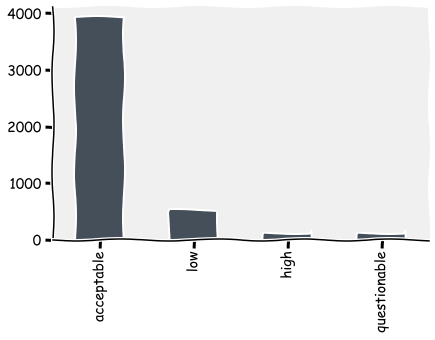

In [8]:
#showing the data quality in the original anage datatset
with plt.xkcd():
    anage['Data quality'].value_counts().plot(kind = 'bar', color ='#444F5A' )
    sns.despine(top=True, right=True, left=False, bottom=False)

In [9]:
#dropping rows where Data quality is neither high nor acceptable.
anage.drop(anage[~anage['Data quality'].isin(['high' , 'acceptable'])].index , inplace = True)

In [10]:
#resetting the index.
anage.reset_index(drop = True)

,HAGRID,Kingdom,Phylum,Class,Order,Family,Genus,Species,Common name,Female maturity (days),...,Birth weight (g),Adult weight (g),Maximum longevity (yrs),Source,Data quality,IMR (per yr),MRDT (yrs),Metabolic rate (W),Body mass (g),Temperature (K)
0,3,Animalia,Annelida,Polychaeta,Sabellida,Siboglinidae,Escarpia,laminata,Escarpia laminata,NaN,...,NaN,NaN,300.00,1466,acceptable,NaN,NaN,NaN,NaN,NaN
1,5,Animalia,Annelida,Polychaeta,Sabellida,Siboglinidae,Lamellibrachia,luymesi,Lamellibrachia luymesi,NaN,...,NaN,NaN,250.00,652,acceptable,NaN,NaN,NaN,NaN,NaN
2,6,Animalia,Annelida,Polychaeta,Sabellida,Siboglinidae,Seepiophila,jonesi,Seepiophila jonesi,NaN,...,NaN,NaN,300.00,1467,acceptable,NaN,NaN,NaN,NaN,NaN
3,9,Animalia,Arthropoda,Branchiopoda,Diplostraca,Daphniidae,Daphnia,pulicaria,Daphnia,NaN,...,NaN,NaN,0.19,NaN,acceptable,NaN,NaN,NaN,NaN,NaN
4,11,Animalia,Arthropoda,Insecta,Diptera,Drosophilidae,Drosophila,melanogaster,Fruit fly,7.0,...,NaN,NaN,0.30,NaN,acceptable,0.05,0.04,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4029,4664,Plantae,Pinophyta,Pinopsida,Pinales,Pinaceae,Pinus,longaeva,Great Basin bristlecone pine,NaN,...,NaN,NaN,5062.00,1289,acceptable,NaN,999.00,NaN,NaN,NaN
4030,4665,Plantae,Tracheophyta,Magnoliopsida,Fabales,Fabaceae,Vachellia,tortilis,Umbrella thorn,NaN,...,NaN,NaN,650.00,1446,acceptable,NaN,NaN,NaN,NaN,NaN
4031,4666,Plantae,Tracheophyta,Magnoliopsida,Malvales,Malvaceae,Adansonia,digitata,African baobab,NaN,...,NaN,NaN,2500.00,1423,acceptable,NaN,NaN,NaN,NaN,NaN
4032,4667,Plantae,Tracheophytes,Ginkgoopsida,Ginkgoales,Ginkgoaceae,Ginkgo,biloba,Common ginkgo,NaN,...,NaN,NaN,1000.00,1432,acceptable,NaN,NaN,NaN,NaN,NaN


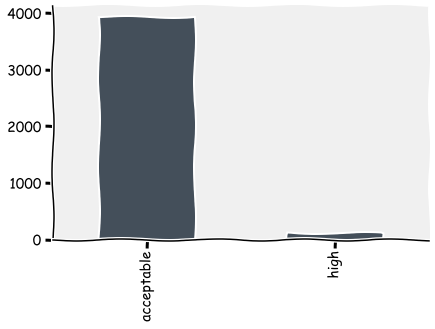

In [11]:
#showing the data quality in the changed anage datatset
with plt.xkcd():
    anage['Data quality'].value_counts().plot(kind = 'bar' , color = '#444F5A')
    sns.despine(top=True, right=True, left=False, bottom=False)

In [12]:
#new shape after dropping unnecassery columns and rows
anage.shape

(4034, 23)

In [13]:
#converting Temperature (K) from kelvins to celsius => eq : C = K - 273.15
anage['Temperature (K)'] = anage['Temperature (K)'] - 273.15

In [14]:
#renaming some columns so they make better sense: 
anage.rename(columns = {
    'IMR (per yr)' : 'Infant mortality rate (per yr)', 
    'MRDT (yrs)' : 'Mortality rate doubling time (yrs)',
    'Temperature (K)' : 'Temperature (C)'
} , inplace = True)

# 

# 

# 

# 

# 

# 

# 

# 

# 

# 

# 

# 

# 

# 

# 

# 


![Image of animals](https://www.freepnglogos.com/uploads/animals-png/animals-vesperius-deviantart-8.png)


# 

## Table of content: 
### [ Top 15 animals with maximum longevity](#top15longevity)
### [Top 15 animals with least longevity](#bottom15longevity)
### [What is the maximum known age for a human?](#humanage)
### [Top 5 longest-lived mammals](#top5agemammals)
### [Comparing female and male mamallians' maturity age (in years)](#femaleVSmalemammalsage)
### [Species with negligible senescence (examining MRDT)](#mrdt)
 - ### [Top 10 species with negligible senescence](#mrdt1)
 - ### [Mortality rate doubling time of a human](#mrdt2)
 - ### [Ever heard of 'dog years'? How is this calculated? it all has to do with the MRDT!](#mrdt3)

 
### [Observing the correlation between body size and longevity using plots](#massagainstage)
- ### [Plotting the correlation combining all 6 classes](#massagainstage1)

# 

# 

# 

# 

# <a id='top15longevity'>Top 15 animals with maximum longevity:</a>



In [15]:
top15_longevity = anage[['Common name' , 'Maximum longevity (yrs)']].sort_values(by ='Maximum longevity (yrs)', ascending = False).dropna().head(15).set_index('Common name')
top15_longevity

,Maximum longevity (yrs)
Common name,
Great Basin bristlecone pine,5062.0
African baobab,2500.0
Common ginkgo,1000.0
Umbrella thorn,650.0
Ocean quahog clam,507.0
Greenland shark,392.0
Escarpia laminata,300.0
Seepiophila jonesi,300.0
Lamellibrachia luymesi,250.0


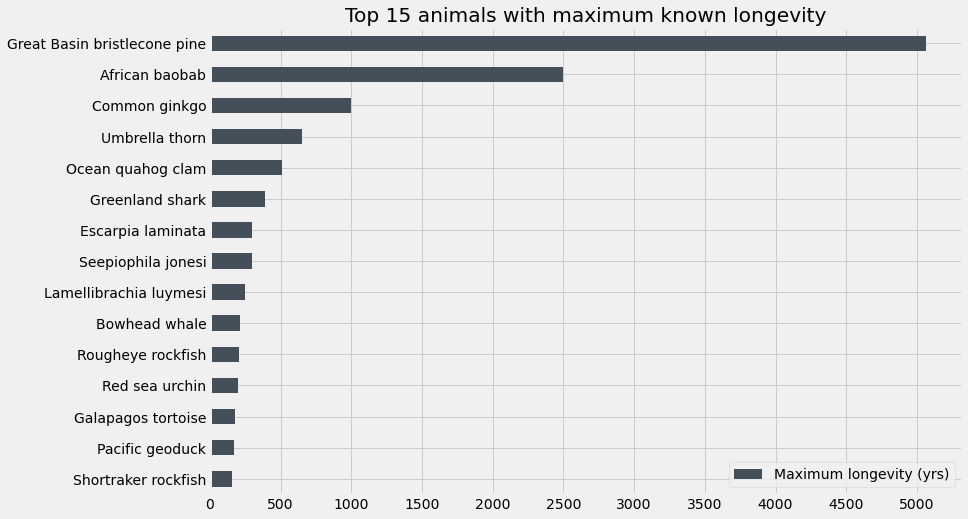

In [43]:
top15_longevity.plot.barh(figsize=(12,8), color = '#444F5A')
plt.title("Top 15 animals with maximum known longevity", loc="center")
plt.ylabel('')
plt.gca().invert_yaxis()
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(500))

# 

# <a id='bottom15longevity'>Top 15 animals with least longevity:</a>

In [17]:
bottom15_longevity = anage[['Common name' , 'Maximum longevity (yrs)']].sort_values(by ='Maximum longevity (yrs)', ascending = False).dropna().tail(15).set_index('Common name')
bottom15_longevity

,Maximum longevity (yrs)
Common name,
Kilombero,0.80
California seahare,0.60
Bassian thrush,0.60
Cardiocondyla obscurior,0.50
Squinting bush brown,0.50
Mediterranean fruit fly,0.49
Fruit fly,0.30
Buff tailed bumblebee,0.27
Daphnia,0.19


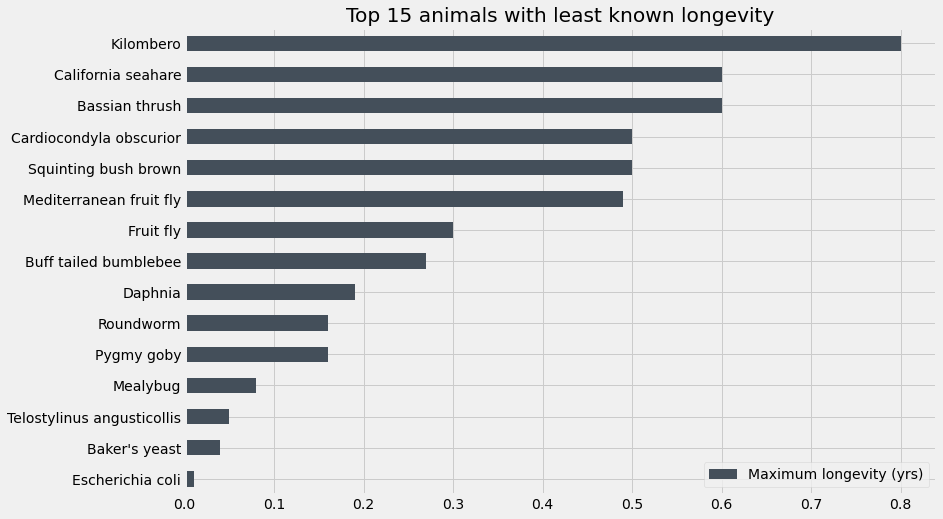

In [18]:
bottom15_longevity.plot.barh(figsize=(12,8), color ='#444F5A')
plt.title("Top 15 animals with least known longevity", loc="center")
plt.ylabel('')
plt.gca().invert_yaxis()

# 

# <a id='humanage'>What is the maximum known age for a human? </a>

In [19]:
anage[anage['Common name'] == 'Human'].set_index('Common name')[['Maximum longevity (yrs)']]

,Maximum longevity (yrs)
Common name,
Human,122.5


# 

<img src="https://pp.userapi.com/c841536/v841536639/344fc/7VvWx8sJ5_w.jpg" 
     align="left" 
 />

#### Did you know?

The longest documented and verified human lifespan is that of Jeanne Calment of France (1875–1997), a woman who lived to age 122 years and 164 days.

# 

# <a id='top5agemammals'>Top 5 longest-lived mammals:</a>

In [20]:
mammals = anage['Class'] == 'Mammalia'

In [21]:
top5_longest_lived_mammals = anage[mammals][['Common name' , 'Maximum longevity (yrs)']].set_index('Common name').sort_values(by='Maximum longevity (yrs)',ascending = False).head(5)
top5_longest_lived_mammals

,Maximum longevity (yrs)
Common name,
Bowhead whale,211.0
Human,122.5
Fin whale,114.0
Blue whale,110.0
Humpback whale,95.0


<AxesSubplot:>

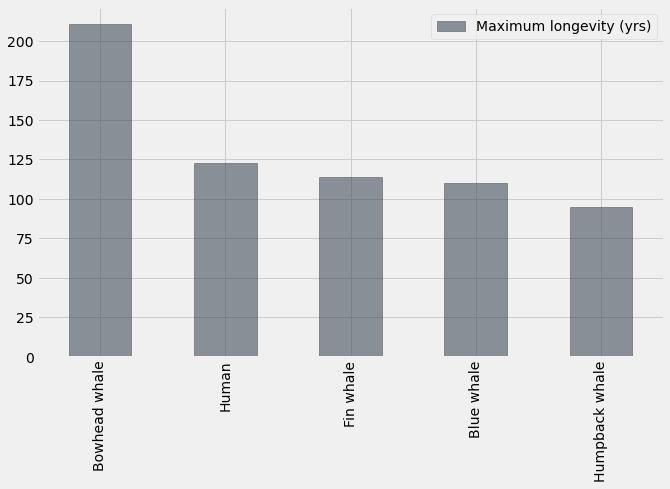

In [42]:
top5_longest_lived_mammals.plot(kind ='bar' , figsize = (10,6), xlabel='',color='#444F5A',edgecolor='black', alpha=0.6)

# 


# <a id='femaleVSmalemammalsage'>Comparing female and male mamallians' maturity age (in years):</a>

In [23]:
#creating a dataset where cols are maturity of female / maturity of males, and setting the index to the animal's common name.
df = anage[mammals][['Common name','Female maturity (days)','Male maturity (days)']].dropna().set_index('Common name').sort_values(by =['Female maturity (days)' ],ascending = False).head(15)/365
df

,Female maturity (days),Male maturity (days)
Common name,,
Bowhead whale,22.498630,22.498630
Human,13.000000,14.000000
Baird's beaked whale,12.008219,8.005479
Melon-headed whale,11.753425,6.753425
African bush elephant,11.008219,10.000000
Killer whale,10.356164,13.506849
Northern bottlenose whale,10.005479,9.005479
Sei whale,10.005479,10.005479
Risso's dolphin,10.005479,10.005479


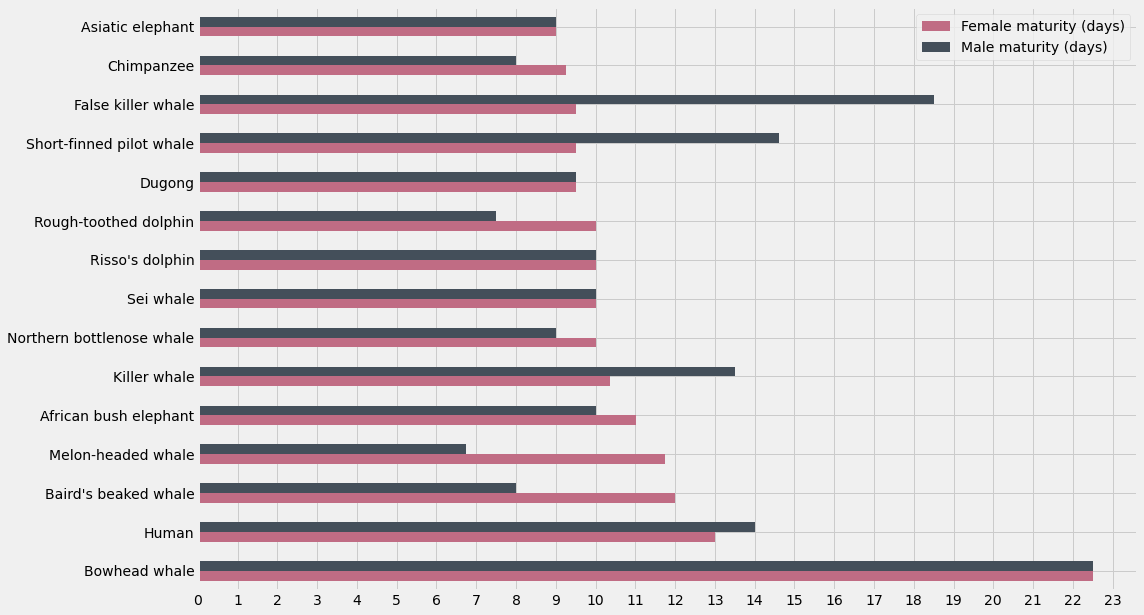

In [41]:

#plotting the dataframe
df.plot(kind="barh",figsize=(15,10),width=0.5,color=['#C06C84', '#444F5A'], xlabel='')
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))


# 

# <a id='mrdt'>Species with negligible senescence (examining MRDT):</a>


- MRDT, or Mortality Rate Doubling Time, is the rate at which mortality increases the double by age. Often used as a species-typical measure of aging, because it doesn't seem to vary much within species. Basically it's a measurement of senescence rate. For example: The MRDT of the *Killer Whale* is *14*. This translates to: the *Killer Whale* ages twice as much every 14 years.

- ## Top 10 species with negligible senescence:
<a id='mrdt1'></a>

In [25]:
#These 10 species have age independent mortality.
species_with_negligible_senescene = anage[['Species' ,'Common name', 'Maximum longevity (yrs)','Mortality rate doubling time (yrs)']].set_index('Species').sort_values(by = 'Mortality rate doubling time (yrs)', ascending = False).head(10)
species_with_negligible_senescene

,Common name,Maximum longevity (yrs),Mortality rate doubling time (yrs)
Species,,,
longaeva,Great Basin bristlecone pine,5062.0,999.0
islandica,Ocean quahog clam,507.0,999.0
anguinus,Olm,102.0,999.0
carolina,Eastern box turtle,138.0,999.0
aleutianus,Rougheye rockfish,205.0,999.0
franciscanus,Red sea urchin,200.0,999.0
blandingii,Blanding's turtle,77.0,999.0
salamandra,European fire salamander,24.0,999.0
fazilae,Fazila's salamander,10.0,999.0


*Notice the HUGE decrease in MRDT between the top 9 species and the fluviatilis specie. However, when you compare it to the maximum longevity, you quickly find it is indeed negligible.*

- ## 10 species with least measured MRDT:
<a id='mrdt2'></a>

In [26]:
#These 10 species have age independent mortality.
species_with_high_senescene = anage[['Species' ,'Common name', 'Maximum longevity (yrs)','Mortality rate doubling time (yrs)']].set_index('Species').sort_values(by = 'Mortality rate doubling time (yrs)').head(10)
species_with_high_senescene

,Common name,Maximum longevity (yrs),Mortality rate doubling time (yrs)
Species,,,
melanogaster,Fruit fly,0.30,0.04
elegans,Roundworm,0.16,0.04
adloffi,Annual fish,3.70,0.10
norvegicus,Norway rat,3.80,0.30
musculus,House mouse,4.00,0.30
leucopus,White-footed mouse,7.90,0.50
reticulata,Guppy,5.00,0.80
japonica,Japanese quail,6.00,1.20
dalli,Dall's sheep,19.60,1.50


- ## Mortality rate doubling time of a human:
<a id='mrdt2'></a>

In [27]:
#MRDT of a human
anage[anage['Common name'] == 'Human'].set_index('Common name')[['Mortality rate doubling time (yrs)']]

,Mortality rate doubling time (yrs)
Common name,
Human,8.0


- ## Ever heard of 'dog years'? How is this calculated? it all has to do with the MRDT of humans vs that of domestic dogs:
<a id='mrdt3'></a>

In [28]:
#MRDT of a dog
anage[anage['Common name'] == 'Domestic dog'].set_index('Common name')[['Mortality rate doubling time (yrs)']]

,Mortality rate doubling time (yrs)
Common name,
Domestic dog,3.0


# 


# <a id='massagainstage'>Observing the correlation between body size and longevity using plots:</a>

In [29]:
#Log normalization of data , and addidn two columns into the dataset.
anage['Log of adult weight (g)'] = np.log(anage['Adult weight (g)'])
anage['Log of maximum longevity (yrs)'] = np.log(anage['Maximum longevity (yrs)'])

In [30]:
classes = anage['Class'].value_counts().head(15)
classes
#notice the sample size starting at the Bivalvia class is kind of low compared to top 6 classes
# I will only be sticking to examining the first 6 classes.

Aves                  1346
Mammalia              1003
Teleostei              794
Reptilia               511
Amphibia               154
Chondrichthyes         116
Bivalvia                42
Cephalaspidomorphi      16
Chondrostei             14
Insecta                  9
Holostei                 4
Polychaeta               3
Actinopterygii           3
Magnoliopsida            2
Dipnoi                   2
Name: Class, dtype: int64

In [31]:
# Creating a dataframe containing the log values of adult weight against longevity for 6 most common classes in dataset.
# I also dropped NA values.
weight_against_longevity = anage[anage['Class'].isin(classes.head(6).index)][['Class','Log of adult weight (g)' , 'Log of maximum longevity (yrs)']].dropna()

In [32]:
# Creating class filters for later use in subplotting.
aves = weight_against_longevity['Class']=='Aves'
mammalia =weight_against_longevity['Class']=='Mammalia'
teleostei = weight_against_longevity['Class']=='Teleostei'
reptilia  = weight_against_longevity['Class']=='Reptilia'
amphibia = weight_against_longevity['Class']=='Amphibia'
chondrichthyes =weight_against_longevity['Class']=='Chondrichthyes'

- ## Plotting the correlation combining 6 classes:

  *Using Seaborn regplots: scatter plots with overlaid regression lines*

<a id='massagainstage1'></a>

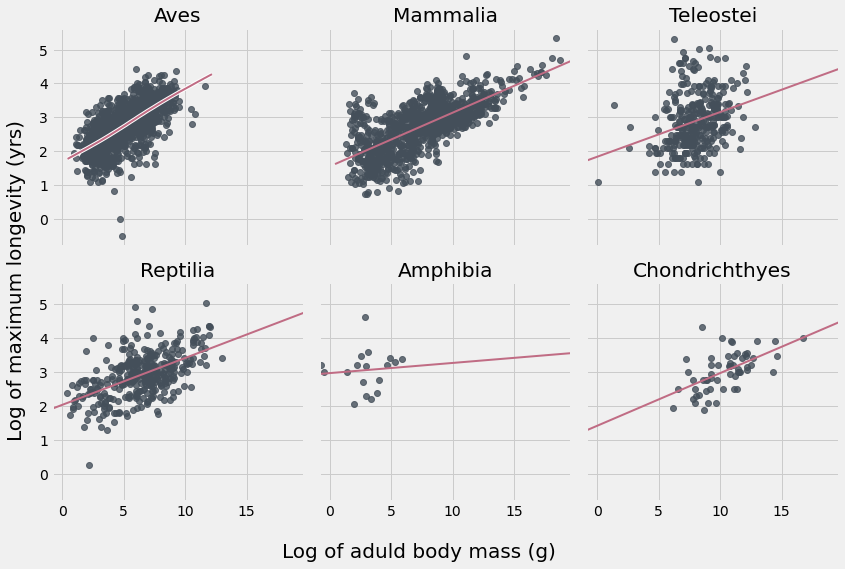

In [40]:
#plotting regplots for each class
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (12,8),sharex = True, sharey=True)
fig.supylabel('Log of maximum longevity (yrs)', fontsize = 20)
fig.supxlabel('Log of aduld body mass (g) ', fontsize = 20)
colors=['#C06C84', '#444F5A']

# Aves
aves_sns = sns.regplot(
    ax=ax[0][0],
    data=weight_against_longevity[aves],
    x='Log of adult weight (g)',
    y='Log of maximum longevity (yrs)',
    truncate = False,
    line_kws={"color": colors[0], "lw":2},
    scatter_kws = {"color": colors[1]},
    ci = None
)
aves_sns.set(xlabel='')
aves_sns.set(ylabel='')
aves_sns.set_title("Aves")

# Mammalia
mammalia_sns = sns.regplot(
    ax=ax[0,1],
    data=weight_against_longevity[mammalia],
    x='Log of adult weight (g)',
    y='Log of maximum longevity (yrs)',
    truncate = False,
    line_kws={"color": colors[0], "lw":2},
    scatter_kws = {"color": colors[1]},
    ci = None
)
mammalia_sns.set(xlabel='')
mammalia_sns.set(ylabel='')
mammalia_sns.set_title("Mammalia")

# Teleostei
teleostei_sns = sns.regplot(
    ax=ax[0,2],
    data=weight_against_longevity[teleostei],
    x='Log of adult weight (g)',
    y='Log of maximum longevity (yrs)',
    truncate = False,
    line_kws={"color": colors[0], "lw":2},
    scatter_kws = {"color": colors[1]},
    ci = None
)
teleostei_sns.set(xlabel='')
teleostei_sns.set(ylabel='')
teleostei_sns.set_title("Teleostei")

# Reptilia
reptilia_sns = sns.regplot(
    ax=ax[1,0],
    data=weight_against_longevity[reptilia],
    x='Log of adult weight (g)',
    y='Log of maximum longevity (yrs)',
    truncate = False,
    line_kws={"color": colors[0], "lw":2},
    scatter_kws = {"color": colors[1]},
    ci = None
)
reptilia_sns.set(xlabel='')
reptilia_sns.set(ylabel='')
reptilia_sns.set_title("Reptilia")


# Amphibia
amphibia_sns = sns.regplot(
    ax=ax[1,1],
    data=weight_against_longevity[amphibia],
    x='Log of adult weight (g)',
    y='Log of maximum longevity (yrs)',
    truncate = False,
    line_kws={"color": colors[0], "lw":2},
    scatter_kws = {"color": colors[1]},
    ci = None
)
amphibia_sns.set(xlabel='')
amphibia_sns.set(ylabel='')
amphibia_sns.set_title("Amphibia")

# Chondrichthyes         
chondrichthyes_sns = sns.regplot(
    ax=ax[1,2],
    data=weight_against_longevity[chondrichthyes],
    x='Log of adult weight (g)',
    y='Log of maximum longevity (yrs)',
    truncate = False,
    line_kws={"color": colors[0], "lw":2},
    scatter_kws = {"color": colors[1]},
    ci = None
)
chondrichthyes_sns.set(xlabel='')
chondrichthyes_sns.set(ylabel='')
chondrichthyes_sns.set_title("Chondrichthyes")

fig.tight_layout()


 **Observations:**
- None of the slopes are negative.
- There is indeed an association between adult body mass and longevity.
- The correlation is strongest in the Aves class, and weakest in the Amphibia class.
